# Visualisation - Prosper Loan 


## I. Preliminary Wrangling

> This dataset contains the historical data of prosper loans which include the borrowers & lenders details as well as loan information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load dataset
prosper_loan_data=pd.read_csv('/Users/yc28/Desktop/Coding/Udacity_DA/project4/prosperLoanData.csv')
prosper_loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
prosper_loan_data.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

In [5]:
# Check the size of the dataset
prosper_loan_data.shape

(113937, 81)

In [6]:
# Check the completeness of the dataset
prosper_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# Check statistics of the dataset
prosper_loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### Dataset Structure

> This dataset contains 113937 rows and 81 columns.

### Main Feature(s) of Interest in the Dataset

> - Profiles of both investors and the loans in the dataset.
> - How loan ratings are associated with borrower rate, term of loan and estimated return?
> - What is the relationship between estimated return and borrower rate?
>
> Furthermore, I would also like to explore some complex relationships:
> - Relationship between borrower rate and stated monthly income by different terms on loan
> - Relationship between estimated return and prosper ratings by different terms of loan
> - Relationship between estimated return and stated monthly income by borrower rate

### Features will Help Support my Investigation into my Feature(s) of Interest

> - Borrower profile: Borrower rate, stated monthly income
> - Loan profie: ProsperRating (Alpha), term of loan, estimated return

## II. Univariate Exploration


In this section, I'm going to explore the distributions of each individual variable.

(-0.1827, 0.2837)

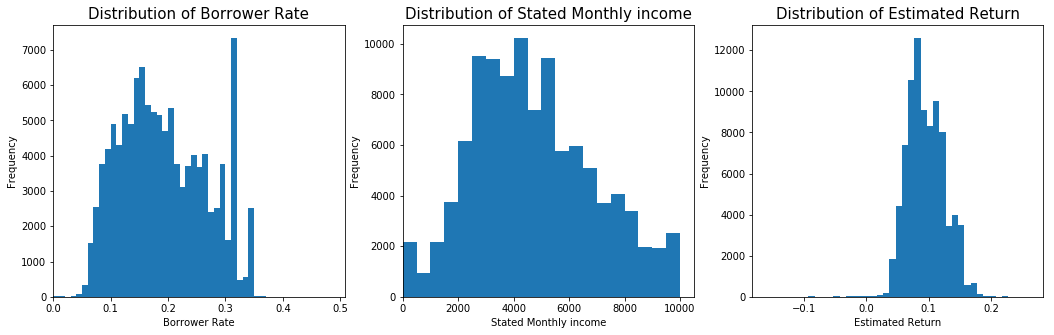

In [49]:
# Histogram of individual variables
fig, ax = plt.subplots(1,3,figsize=(10,5))
plt.subplots_adjust(right=1.5)


# Plot 1st graph to show the distribution of borrower rate
x_bins1=np.arange(0,0.5,0.01)
ax[0].hist(data=prosper_loan_data,x='BorrowerRate',bins=x_bins1)
ax[0].set_title('Distribution of Borrower Rate',size=15)
ax[0].set_xlabel('Borrower Rate')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim([0,prosper_loan_data.BorrowerRate.max()+0.01])


# Plot 2nd graph to show the distribution of stated monthly income
x_bins2=np.arange(0,1e4+500,500)
ax[1].hist(data=prosper_loan_data,x='StatedMonthlyIncome',bins=x_bins2)
ax[1].set_title('Distribution of Stated Monthly income',size=15)
ax[1].set_xlabel('Stated Monthly income')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim([0,1e4+500])


# Plot 3rd graph to show the distribution of estimated return
x_bins3=np.arange(prosper_loan_data.EstimatedReturn.min()-0.01,prosper_loan_data.EstimatedReturn.max()+0.01,0.01)
ax[2].hist(data=prosper_loan_data,x='EstimatedReturn',bins=x_bins3)
ax[2].set_title('Distribution of Estimated Return',size=15)
ax[2].set_xlabel('Estimated Return')
ax[2].set_ylabel('Frequency')
ax[2].set_xlim([prosper_loan_data.EstimatedReturn.min(),prosper_loan_data.EstimatedReturn.max()])

> From the 1st graph, it can be seen that the borrower rate sits between 0.05 and 0.40. The most popular borrower rate is 0.3.
> The 2nd graph shows the distribution of stated monthly income. As illustrated, the distribution is right skewed. Most frequent stated monthly income is around 4000.
> The 3rd graph demonstrate the distribution of the estimated return of the loan. It can be seen that most of the loans have return rate between 0~0.2.

Text(0.5,1,'Prosper Rating (Alpha) Distribution')

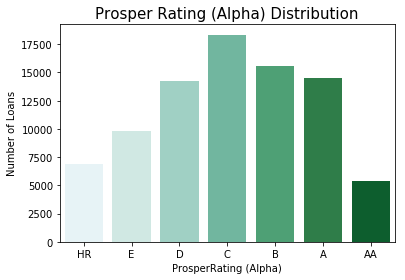

In [9]:
# Plot a bar chart to shows the amount of loans for each prosper rating
rating_scale=['HR','E','D','C','B','A','AA']
rating_color=sb.color_palette("BuGn", n_colors=7)
sb.countplot(data=prosper_loan_data, x='ProsperRating (Alpha)',order=rating_scale,palette=rating_color)
plt.ylabel('Number of Loans')
plt.title('Prosper Rating (Alpha) Distribution',size=15)

> The above graph shows the number of loans for different prosper ratings. C-rated loan has the largest number, whereas HR loan has the smallest number.

Text(0.5,1,'Proportion of Different Terms of Loan')

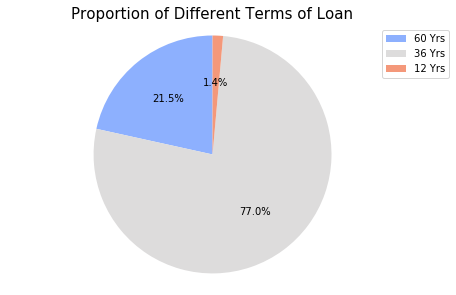

In [10]:
# Plot a pie chart to demonstrate the proportions of different loan terms
## Gather data
labels = ['60 Yrs', '36 Yrs','12 Yrs']
sixty_prop=prosper_loan_data.Term.value_counts()[60]/len(prosper_loan_data)
thirtysix_prop=prosper_loan_data.Term.value_counts()[36]/len(prosper_loan_data)
twelve_prop=prosper_loan_data.Term.value_counts()[12]/len(prosper_loan_data)
                                                                     
sizes = [sixty_prop,thirtysix_prop,twelve_prop]

## Plot
term_colors = sb.color_palette("coolwarm", 3)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=term_colors, autopct='%1.1f%%',
        startangle=90)
### Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend(labels,bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))

plt.title('Proportion of Different Terms of Loan',size=15)

> From the above pie chart it can be illustrated that, the majority of loans has 36-year term (77%), followed by 60-year (21.5%) and 12-year (1.4%) terms.

## III. Bivariate Exploration


In this section, I would like to conduct exploratory analysis of my initial questions:
- How loan ratings are associated with borrower rate, term of loan and estimated return?
- What is the relationship between estimated return and borrower rate?

#### How loan ratings are associated with borrower rate, term of loan and estimated return? 

Text(0.5,1,'Correlation between Borrower Rate and Prosper Rating (Alpha)')

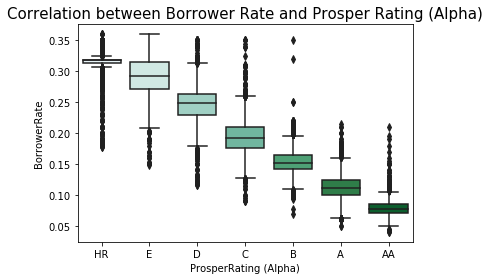

In [11]:
# Relationship between prosper loan rating and borrorow rate
sb.boxplot(data=prosper_loan_data,x='ProsperRating (Alpha)',y='BorrowerRate',order=rating_scale,palette=rating_color)
plt.title('Correlation between Borrower Rate and Prosper Rating (Alpha)',size=15)

> From the above box chart it can be seen that, the higher the prosper rating is, the lowerer is the borrower rate. The box chart also shows the distribution of borrrower rate within each rating score. For most of the ratings, we observe a few outliers. For example, for C-rated loans, there are quite a few outliers beyond min (Q1-1.5 IQR) and max (13+1.5 IQR) points.

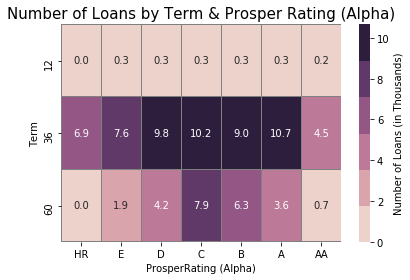

In [12]:
# Relationship between prosper loan rating and terms
bt_means=prosper_loan_data.groupby(['ProsperRating (Alpha)','Term']).count()['ListingKey'].reset_index(name='count')
bt_means=bt_means.pivot(columns='ProsperRating (Alpha)',index='Term',values='count')
bt_means=bt_means.fillna('0').astype(int)
bt_means=bt_means[rating_scale]
bt_means=bt_means.div(1e3)
sb.heatmap(data=bt_means,cmap=sb.cubehelix_palette(), annot=True, fmt = '.1f',
           cbar_kws = {'label' : 'Number of Loans (in Thousands)'},linecolor='grey',linewidths=0.01)
plt.title('Number of Loans by Term & Prosper Rating (Alpha)',size=15)
plt.tight_layout()

> This heat map shows the number of loans by the all possible combination of prosper ratings and terms of loan. In general, 12-year term has the least number of loans regardless of prosper ratings. The most number of loans fall into 36-year term and across all prosper ratings. A-rated and 36-year term loan has the largest number.

In [13]:
# As there are some missing data in EstimatedReturn column, we would exclude the rows where EstimatedReturn is not available
EstimatedReturn_df=prosper_loan_data[prosper_loan_data.EstimatedReturn.notnull()]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Estimated Return and Prosper Rating')

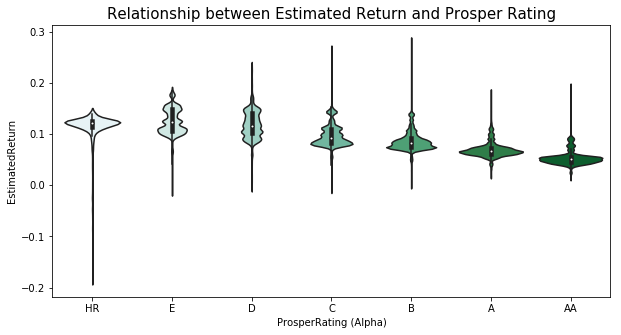

In [14]:
# Relationship between prosper loan rating and estimated return
fig,ax=plt.subplots(1,1, figsize=(10,5))

sb.violinplot(data=EstimatedReturn_df, x='ProsperRating (Alpha)',y='EstimatedReturn',order=rating_scale,palette=rating_color)
plt.title('Relationship between Estimated Return and Prosper Rating',size=15)

> From the above graph, it can be seen that the higher the prosper rating, the lower estimates return is, although the correlation does not seem significant. Furthermore, HR-rated loans have the widest range of estimated return and have the highest possibility of loss, whereas B-rated and C-rated loans tend to have high estimated return.

#### What is the relationship between estimated return and borrower rate?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Estimated Return and Borrower Rate')

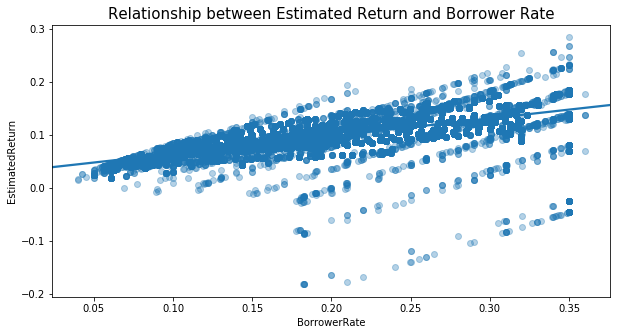

In [15]:
# Relationship between estimated return and borrower rate
fig,ax=plt.subplots(1,1, figsize=(10,5))

sb.regplot(data=EstimatedReturn_df,x='BorrowerRate',y='EstimatedReturn',scatter_kws = {'alpha' : 1/3})
plt.title('Relationship between Estimated Return and Borrower Rate',size=15)

> This scatter plot displays the relationship between estimated return and borrower rate. Overall, there exists a positive correlation between these two variables. However, we can see that, from borrower rate of 0.2, there are more outliers dispersed from the regression line. This could imply that, the higher the borrower rate, the more uncertain estimated return could be.

## IV. Multivariate Exploration



In this section, I'm going to explore the correlations incorporating at least 3 variables.
- Relationship between borrower rate and stated monthly income by different terms on loan
- Relationship between estimated return and prosper ratings by different terms of loan
- Relationship between estimated return and stated monthly income by borrower rate

#### Relationship between borrower rate and stated monthly income by different terms on loan

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 100000.0)

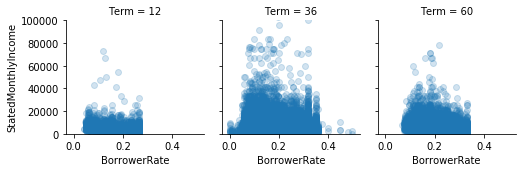

In [16]:
# Plot the relationship of stated monthly income and borrower rate based on different terms of loan
g=sb.FacetGrid(data=prosper_loan_data,col='Term',size = 2.5,
                margin_titles = True)
g.map(sb.regplot,'BorrowerRate','StatedMonthlyIncome',fit_reg = False,scatter_kws = {'alpha' : 1/5})

g.set_titles('{col_name}')
plt.ylim([0,1e5])

> The above charts display the relationship between stated monthly income and borrower rate based on different terms of loan. Comparing three graphs, we can see that the stated monthly income for investors who select the 12-year loan is relatively low. More wealthy investors choose the 36-year loan with borrower rate around 0.2. 
>
> In addition, there seems to be little difference in the borrower rate distribution. However, it can be noticed that, borrower rate is relatively low for 12-year loan compared to loans of other two terms. Furthermore, the borrower rate for 36-year loan has a wider range than the others.

#### Relationship between estimated return and prosper ratings by different terms of loan

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Estimated Return and Prosper Ratings by Term Loan')

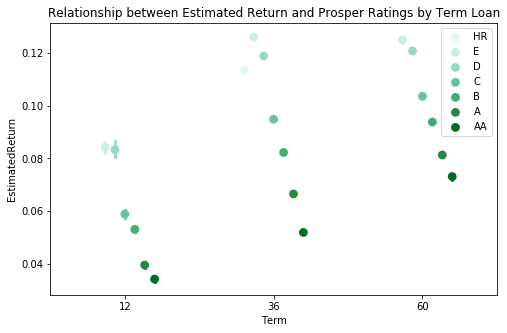

In [37]:
#Relationship between estimated return and different prosper ratings based on different terms of loan
fig,ax=plt.subplots(1,1, figsize=(8,5))

sb.pointplot(data=EstimatedReturn_df, x='Term',y='EstimatedReturn',hue='ProsperRating (Alpha)',hue_order=rating_scale,
            palette = rating_color, linestyles = '', dodge = 0.4)
plt.legend()
plt.title('Relationship between Estimated Return and Prosper Ratings by Term Loan',size=15)

> From the above point plot it can be seen that for loans of each term, the higher the prosper rating, the higher the estimated return would be. 

#### Relationship between estimated return and stated monthly income by borrower rate

Text(0.5,1,'Relationship between Estimated Return and Stated Monthly Income by Borrower Rate')

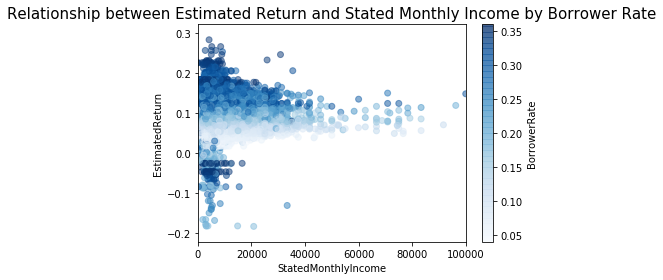

In [46]:
#Relationship between estimated return and stated monthly income by borrower rate
plt.scatter(data=EstimatedReturn_df,x='StatedMonthlyIncome',y='EstimatedReturn',c='BorrowerRate',
            alpha=0.5,cmap='Blues')
plt.xlim([0,1e5])
plt.colorbar(label='BorrowerRate')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('EstimatedReturn')
plt.title('Relationship between Estimated Return and Stated Monthly Income by Borrower Rate',size=15)

> From this scatter plot, there seems to be litte correlation between estimated return and stated monthly income. This is shown when the investors with both the higest and the lowest estimated return have monthly income around 20,000. Furthermore, the correlation between borrower rate and estimated return seem insignificant from this graph.

In [11]:
#!jupyter nbconvert "Project4_data_visualisation.ipynb" --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Project4_data_visualisation.ipynb to slides
[NbConvertApp] Writing 455524 bytes to Project4_data_visualisation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/anaconda3/lib/python3.7/s